In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from image_extractor import init_lut,apply_lut, hsv_filter, histogram_analysis, linear_fn, curved, HE, hsv_contour_extract, preprocess_hsv, statistic_analysis

# image2_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (99).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (3).JPG'
image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (46).JPG'

plt.rcParams['figure.dpi'] = 102.46 


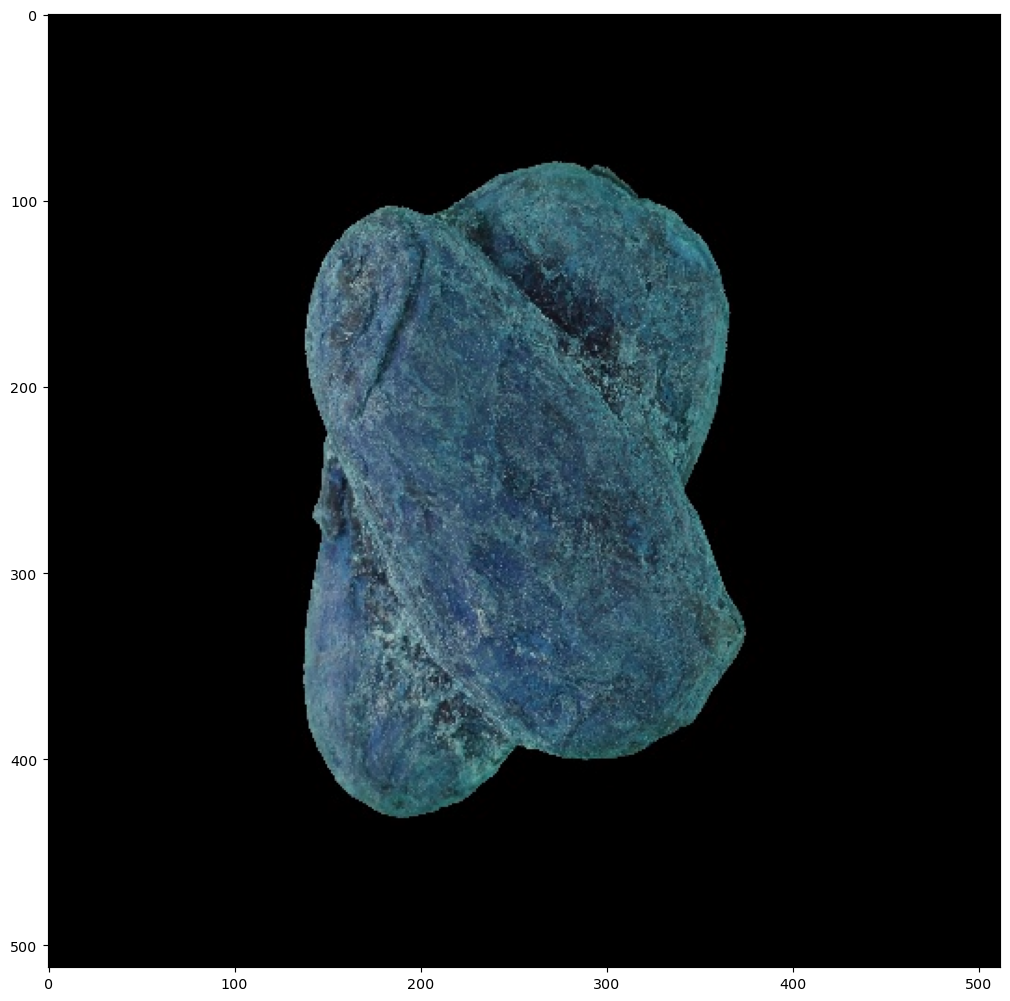

In [10]:
image  = cv2.imread(image_dir)
# image2 = cv2.imread(image2_dir)
im_shape = np.shape(image)
# print(im_shape)
plt.imshow(image)
# lut3 = init_lut(fn=bezier)
# plt.rcParams["figure.figsize"] = (5,5)
# plt.plot(np.linspace(0,255,256), lut);
# plt.plot(np.linspace(0,255,256), lut2);
# plt.show()

In [11]:

image_hsv, cnt = preprocess_hsv(image)
print(np.shape(image_hsv))
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
image_rgb_drawed = image_rgb;
# croped_img = image_hsv
# image_rgb_bb = draw_bb(image_rgb, (x,y,w,h))

# image_hsv2 = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
# image_hsv2 = apply_lut(image_hsv2, 2, lut2)
# image_hsv2 = hsv_filter(image_hsv2)
# image_rgb2 = cv2.cvtColor(image_hsv2,cv2.COLOR_HSV2RGB)
# (x,y,w,h) = find_bb(image_hsv2)
# croped_img2 = image_rgb2[y:y+h,x:x+w]
# image_rgb_bb2 = draw_bb(image_rgb2, (x,y,w,h))


ori =  4.9871063232421875
(360, 251, 3)


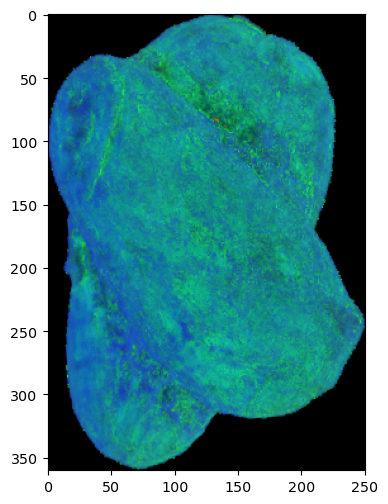

In [12]:
# ct1 = contour_extractor(blur1)
ct1, ct2 = hsv_contour_extract(image_hsv)


for cnt in ct2:
    perimeter = cv2.arcLength(cnt,True)
    if perimeter>100:
        # print(perimeter)
        approximatedShape = cv2.approxPolyDP(cnt, 0.005 * perimeter, True)
        cv2.drawContours(image_rgb_drawed, [approximatedShape], -1, (255, 255, 0), 1)

plt.rcParams["figure.figsize"] = (4,8)
plt.imshow(image_hsv)
plt.show()

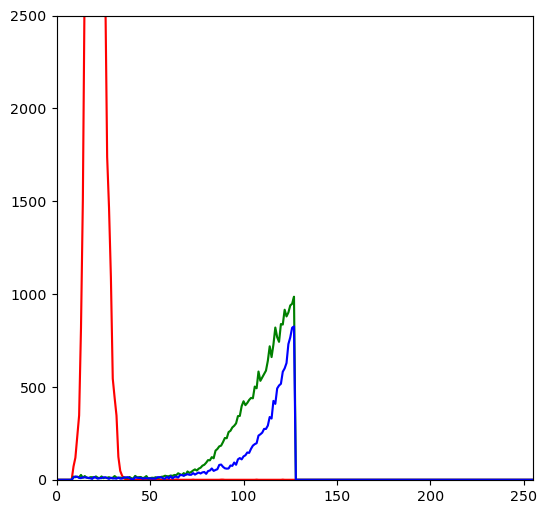

In [13]:
plt.rcParams["figure.figsize"] = (10,5)
# plt.subplot(1,2,1)
histogram = histogram_analysis(image_hsv, plot=True)
# plt.subplot(1,2,2)
# histogram2 = histogram_analysis(croped_img2, plot=True)

In [14]:
a=statistic_analysis(image_hsv)
# b=statistic_extractor(croped_img2)
print(a)
# print(b)

[[15.283964143426294 99.5343625498008 105.77771137671536]
 [19.0 125.0 135.0]
 [9.775491392437099 62.50671031607557 65.0048114834379]
 [-0.34858034439249347 -0.7372034218478318 -0.8581554098536283]
 [2.949930882146984 -1.0268072935158024 -0.9679774692455405]]


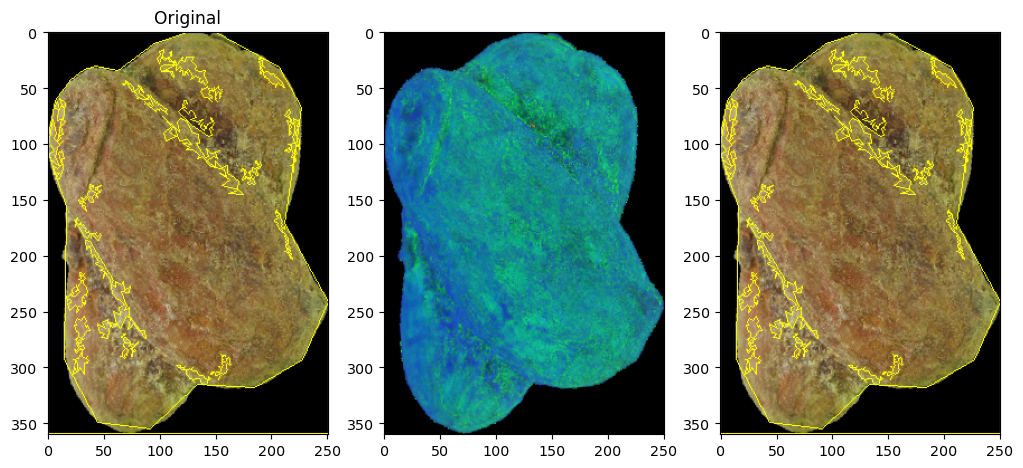

In [15]:
plt.rcParams["figure.figsize"] = (12,24)
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(image_rgb)
plt.subplot(1,3,2)
plt.imshow(image_hsv)
plt.subplot(1,3,3)
plt.imshow(image_rgb_drawed)


plt.show()